<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Curva_de_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2f45ce34a8447a609187b60b649c78e5c8856e9b173f8958a4a4886854d9dca9
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [22]:
from lifelines import WeibullFitter

In [23]:
wb = WeibullFitter()

In [26]:
dados_falha = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])
dados_observed = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

wb.fit(durations=dados_falha,event_observed=dados_observed)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 10 total observations, 0 right-censored observations>

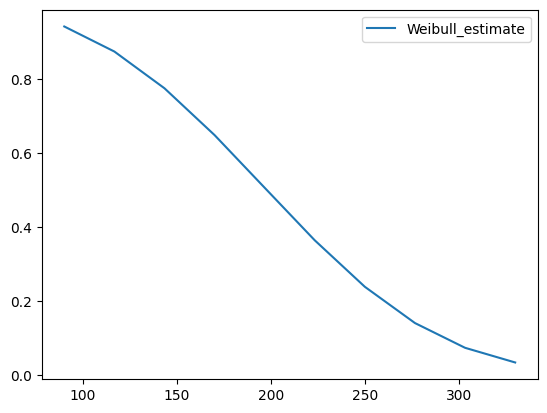

In [27]:
wb.survival_function_.plot()
plt.show()


In [28]:
print(wb.lambda_, wb.rho_)

222.48704412389853 3.1023247345983016


In [29]:
print(wb.predict(20))

0.9994324648605373


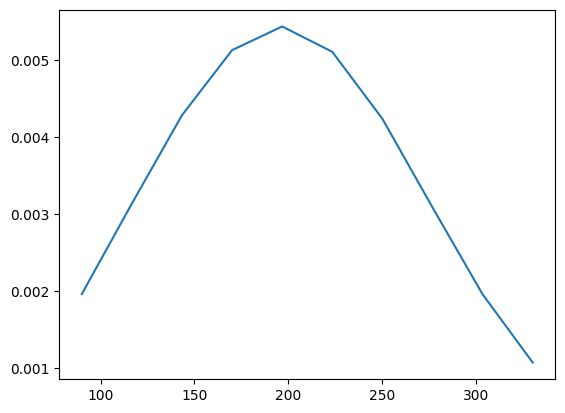

In [31]:
plt.plot(wb.density_)
plt.show()

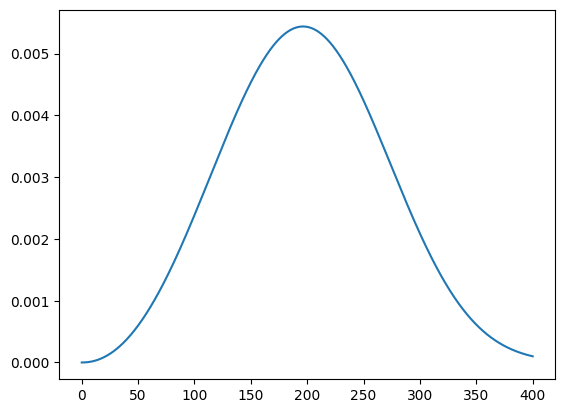

In [35]:
plt.plot(wb.density_at_times(np.linspace(0,400,1000)))
plt.show()

In [58]:
import pandas as pd

df = pd.read_excel('https://github.com/Rogerio-mack/work/raw/main/Dados_analise_weibull_Janelas.xlsx')
df.head()

,141A4800-1,141A4800-2,5-89354-3150
0,13186,29121.0,16129.0
1,29450,13235.0,25704.0
2,15191,14538.0,4486.0
3,24921,2340.0,22166.0
4,14538,21536.0,37035.0


In [59]:
for c in df:
  df[c] = df[c].sort_values().values
  df[c] = df[c].astype('float')
  df[c + 'obs'] = df[c] >= 0
  df[c + 'obs'] = df[c + 'obs'].astype('int')

display(df.head())
display(df.tail())

,141A4800-1,141A4800-2,5-89354-3150,141A4800-1obs,141A4800-2obs,5-89354-3150obs
0,112.0,191.0,1051.0,1,1,1
1,169.0,1316.0,4439.0,1,1,1
2,2067.0,1906.0,4455.0,1,1,1
3,2478.0,2340.0,4486.0,1,1,1
4,2634.0,3505.0,7104.0,1,1,1


,141A4800-1,141A4800-2,5-89354-3150,141A4800-1obs,141A4800-2obs,5-89354-3150obs
61,31517.0,NaN,NaN,1,0,0
62,32684.0,NaN,NaN,1,0,0
63,33005.0,NaN,NaN,1,0,0
64,34417.0,NaN,NaN,1,0,0
65,42505.0,NaN,NaN,1,0,0


In [60]:
df = df.fillna(0)

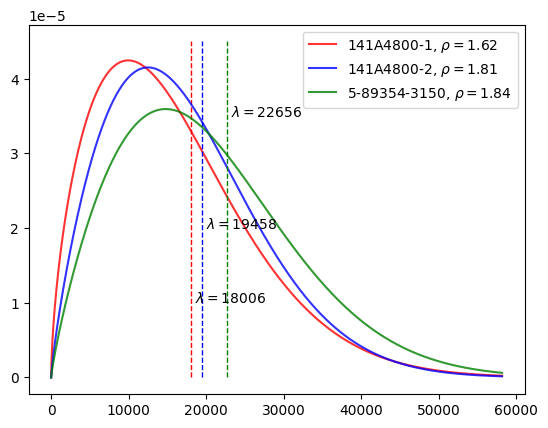

In [88]:
from lifelines import WeibullFitter

wb = WeibullFitter()

for c, color, pos in zip([x for x in df.columns if not 'obs' in x], ['red','blue','green'], [1,2,3.5]):
  wb.fit(durations=df[ df[c] > 0 ][c],event_observed=df[ df[c] > 0 ][c+'obs'])
  plt.plot(wb.density_at_times(np.linspace(0,df.max().max()*1.25,1000)),label=c + ', $\\rho = $' + str(np.round(wb.rho_,2)),c=color,alpha=0.8)
  # print(wb.lambda_, wb.rho_)

  plt.vlines(wb.lambda_,0,4.5*1e-5,linestyle='dashed',color=color,lw=1)
  plt.text(wb.lambda_+500,pos*1e-5,'$\\lambda = $' + str(int(wb.lambda_)))

plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Definindo os dados de falha
dados_falha = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])



In [7]:
# Ajustando a distribuição de Weibull aos dados
shape, loc, scale = weibull_min.fit(dados_falha, floc=0)

# Imprimindo os resultados
print(f"Inclinação (m): {shape:.3f}")
print(f"Vida característica (b): {scale:.3f}")


Inclinação (m): 3.102
Vida característica (b): 222.487


In [8]:
m = shape
b = scale
# Definindo os níveis de confiabilidade
confiabilidade_1 = 0.9  # 90%
confiabilidade_2 = 0.1  # 10%

# Calculando a vida confiável para cada nível
vida_confiável_1 = weibull_min.ppf(confiabilidade_1, m, b)
vida_confiável_2 = weibull_min.ppf(confiabilidade_2, m, b)

# Imprimindo os resultados
print(f"Vida confiável para {confiabilidade_1:.0%}: {vida_confiável_1:.3f} horas")
print(f"Vida confiável para {confiabilidade_2:.0%}: {vida_confiável_2:.3f} horas")


Vida confiável para 90%: 223.795 horas
Vida confiável para 10%: 222.971 horas


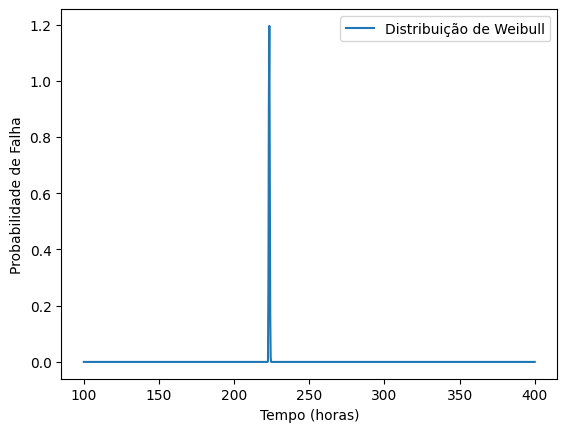

In [11]:
# Definindo o intervalo de tempo
tempo = np.linspace(100, 400, 1000)

# Calculando a probabilidade de falha
probabilidade_falha = weibull_min.pdf(tempo, m, b)

# Plotando a curva
plt.plot(tempo, probabilidade_falha, label="Distribuição de Weibull")
plt.xlabel("Tempo (horas)")
plt.ylabel("Probabilidade de Falha")
plt.legend()
plt.show()


Inclinação (m): 1.0
Vida característica (b): 1.0
Vida confiável para r = 90%: 2.302585092994046
Vida confiável para r = 10%: 0.10536051565782628


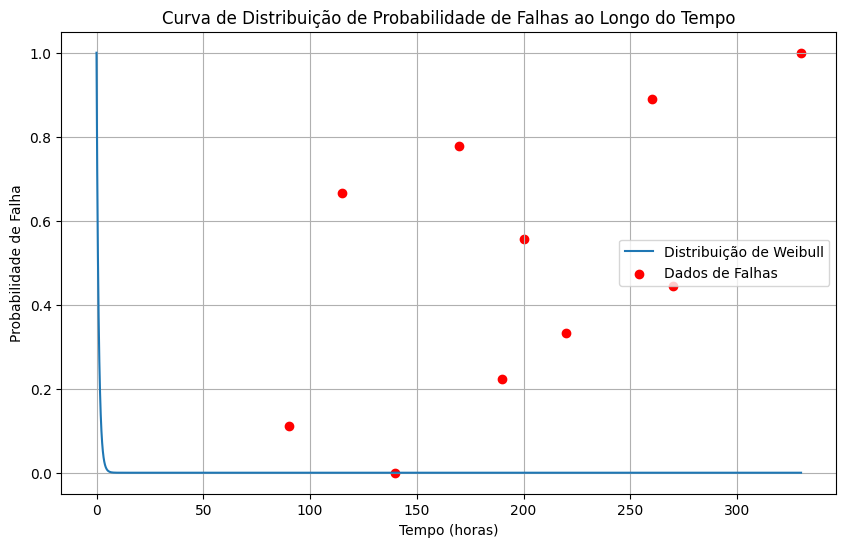

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

# Dados das falhas
tempo_falhas = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])

# 1. Determinar a inclinação (m) e a vida característica (b) da distribuição de Weibull
def weibull_func(tempo, m, b):
    return 1 - np.exp(-((tempo / b) ** m))

params, _ = curve_fit(weibull_func, tempo_falhas, np.linspace(0, 1, len(tempo_falhas)))

m, b = params

# 2. Determinar a vida confiável para r = 90% e r = 10%
r_90 = 0.90
r_10 = 0.10

vida_confiavel_90 = b * (-np.log(1 - r_90)) ** (1 / m)
vida_confiavel_10 = b * (-np.log(1 - r_10)) ** (1 / m)

print("Inclinação (m):", m)
print("Vida característica (b):", b)
print("Vida confiável para r = 90%:", vida_confiavel_90)
print("Vida confiável para r = 10%:", vida_confiavel_10)

# 3. Produzir a curva de distribuição de probabilidades de falhas ao longo do tempo
x = np.linspace(0, tempo_falhas.max(), 1000)
pdf = weibull_min.pdf(x, m, scale=b)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição de Weibull')
plt.scatter(tempo_falhas, np.linspace(0, 1, len(tempo_falhas)), color='red', label='Dados de Falhas')
plt.xlabel('Tempo (horas)')
plt.ylabel('Probabilidade de Falha')
plt.title('Curva de Distribuição de Probabilidade de Falhas ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


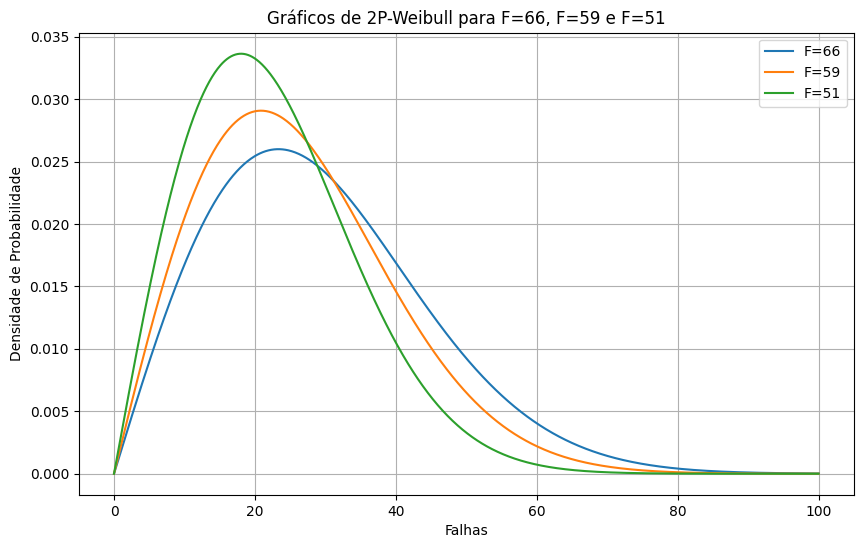

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros da distribuição de Weibull para F=66, F=59 e F=51
c = 2  # Parâmetro de forma comum a todas as distribuições
f_A = 66
f_B = 59
f_C = 51

# Gerar valores para x
x = np.linspace(0, 100, 1000)

# Calcular a função de densidade de probabilidade (PDF) para cada valor de F
pdf_A = weibull_min.pdf(x, c, scale=f_A/c)
pdf_B = weibull_min.pdf(x, c, scale=f_B/c)
pdf_C = weibull_min.pdf(x, c, scale=f_C/c)

# Plotar os gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_A, label='F=66')
plt.plot(x, pdf_B, label='F=59')
plt.plot(x, pdf_C, label='F=51')
plt.xlabel('Falhas')
plt.ylabel('Densidade de Probabilidade')
plt.title('Gráficos de 2P-Weibull para F=66, F=59 e F=51')
plt.legend()
plt.grid(True)
plt.show()


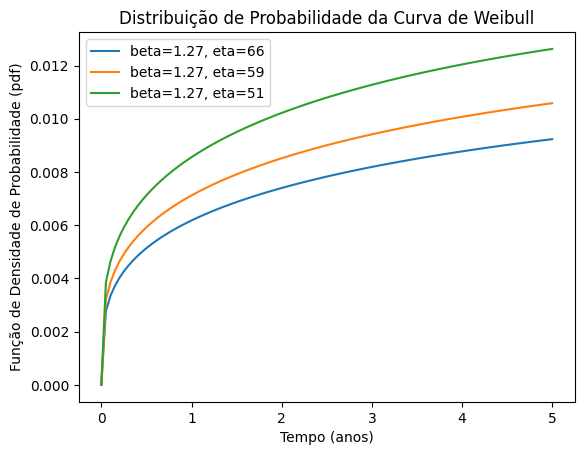

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Valores de forma (beta) e escala (eta) da distribuição de Weibull
beta_values = [1.27]  # Valores de forma
eta_values =  [66, 59, 51]  # Valores de escala

# Tempo (em anos)
time = np.linspace(0, 5, 100)

# Plotar os gráficos da distribuição de probabilidade da curva de Weibull para cada combinação de beta e eta
for beta in beta_values:
    for eta in eta_values:
        # Calcula a função de densidade de probabilidade (pdf) da distribuição de Weibull
        pdf = weibull_min.pdf(time, beta, scale=eta)

        # Plotar a função de densidade de probabilidade
        plt.plot(time, pdf, label=f'beta={beta}, eta={eta}')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Tempo (anos)')
plt.ylabel('Função de Densidade de Probabilidade (pdf)')
plt.title('Distribuição de Probabilidade da Curva de Weibull')
plt.legend()
plt.show()
